In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.animation import FuncAnimation
plt.style.use('ggplot')

In [2]:
#Ruta para guardar las graficas
guardar = '..\Visualizaciones'

<>:2: SyntaxWarning: invalid escape sequence '\V'
<>:2: SyntaxWarning: invalid escape sequence '\V'
C:\Users\Andres\AppData\Local\Temp\ipykernel_12204\2676260054.py:2: SyntaxWarning: invalid escape sequence '\V'
  guardar = '..\Visualizaciones'


In [3]:
def grafica_lollipop(data, texto):
  """
  Cambia el valor del Elo

  Args:
    data (df): Data que se graficara
    texto (str): Texto para el titulo del grafico
  """
  plt.figure(figsize=(15, 10))
  df = data.iloc[:, [0,-1]]
  df = df[df[df.columns[-1]]>0]

  df = df.sort_values(by = df.columns[-1]).reset_index(drop = True, inplace = False)

  plt.hlines(y=df.Equipo, xmin=0, xmax=df[df.columns[-1]])
  plt.plot(df[df.columns[-1]], df.Equipo, "o")
  plt.gca().get_xaxis().set_visible(False)

  for i in range(len(df.Equipo)):
    plt.text(df.at[i, df.columns[-1]] + 1, i-0.1, f"{df.at[i, df.columns[-1]]:,.1f}%")

  plt.title(f'Probabilidad de {texto} \n Basado en la jornada {df.columns[-1][1:]}')

  path = guardar + f'/{texto.replace(' ', "_")}_lollipop.png'
  plt.savefig(path, dpi=100)

  plt.show()

In [4]:
ruta = '../Data/Historial/campeones.csv'
ruta1 = '../Data/Historial/champion.csv'
ruta2 = '../Data/Historial/europa.csv'
ruta3 = '../Data/Historial/descenso.csv'

In [5]:
Campeones = pd.read_csv(ruta, index_col = 'Equipo')
Champion = pd.read_csv(ruta1)
Europa = pd.read_csv(ruta2)
Descenso = pd.read_csv(ruta3)

# Graficas campeones

In [6]:
Campeones = Campeones.sort_values(by = Campeones.columns[-1], ascending = False)
Campeones

,J0,J1,J2,J3,J4,J5,J6,J7,J8,J10,J11,J12,J13,J14,J15,J16,J17,J18,J20
Equipo,,,,,,,,,,,,,,,,,,,
Real Madrid,81.9,72.3,71.2,61.1,59.0,56.3,55.0,53.1,62.4,59.3,24.7,19.9,30.2,32.3,52.9,48.8,50.4,52.9,77.8
Atlético Madrid,3.4,5.1,5.2,3.5,6.3,4.0,3.4,2.6,5.2,2.1,0.6,0.1,1.1,2.7,5.9,8.5,15.8,37.1,14.0
Barcelona,13.0,21.3,22.2,33.3,33.0,39.3,41.3,44.2,32.1,38.5,74.7,80.0,68.7,64.9,41.0,42.7,33.3,9.6,7.3
Athletic Club,0.7,0.1,0.2,0.3,0.1,0.1,0.0,0.1,0.0,0.1,0.0,0.0,0.0,0.1,0.0,0.0,0.5,0.4,0.9
Betis,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Girona,0.5,1.2,1.0,1.7,1.6,0.3,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Real Sociedad,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Villarreal,0.1,0.0,0.1,0.1,0.0,0.0,0.1,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0


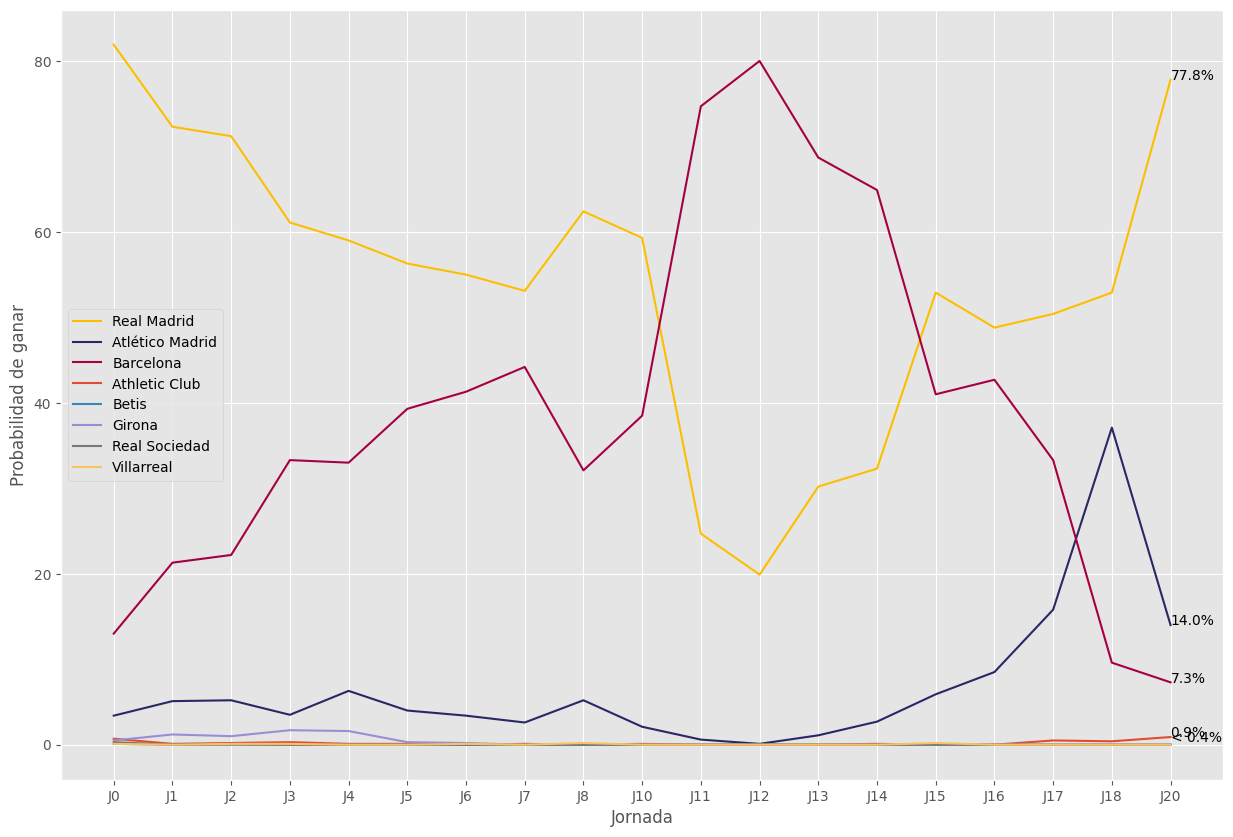

In [7]:
colores = {'Real Madrid': '#fcbf00', 'Barcelona' :'#a50044', 'Atlético Madrid': '#282864'}
plt.subplots(figsize=(15, 10))
for idx, i in enumerate(Campeones.index):
  if idx < 3:
    plt.plot(Campeones.columns, Campeones.T[i], label = i, color = colores[i])
  else:
    plt.plot(Campeones.columns, Campeones.T[i], label = i)

for i in Campeones.T.values[-1][:]:
  if i > 0.6:
    plt.text(Campeones.columns[-1], i, f"{i:,.1f}%")

plt.text(Campeones.columns[-1], 0.4, "< 0.4%")

plt.xlabel('Jornada')
plt.ylabel('Probabilidad de ganar')
plt.legend()
path = guardar + '/Campeones.png'
plt.savefig(path, dpi=100)
plt.show()

In [8]:
Campeones.T.iloc[:11]

Equipo,Real Madrid,Atlético Madrid,Barcelona,Athletic Club,Betis,Girona,Real Sociedad,Villarreal
J0,81.9,3.4,13.0,0.7,0.1,0.5,0.3,0.1
J1,72.3,5.1,21.3,0.1,0.0,1.2,0.0,0.0
J2,71.2,5.2,22.2,0.2,0.1,1.0,0.0,0.1
J3,61.1,3.5,33.3,0.3,0.0,1.7,0.0,0.1
J4,59.0,6.3,33.0,0.1,0.0,1.6,0.0,0.0
J5,56.3,4.0,39.3,0.1,0.0,0.3,0.0,0.0
J6,55.0,3.4,41.3,0.0,0.0,0.2,0.0,0.1
J7,53.1,2.6,44.2,0.1,0.0,0.0,0.0,0.0
J8,62.4,5.2,32.1,0.0,0.0,0.1,0.0,0.2
J10,59.3,2.1,38.5,0.1,0.0,0.0,0.0,0.0


MovieWriter ffmpeg unavailable; using Pillow instead.


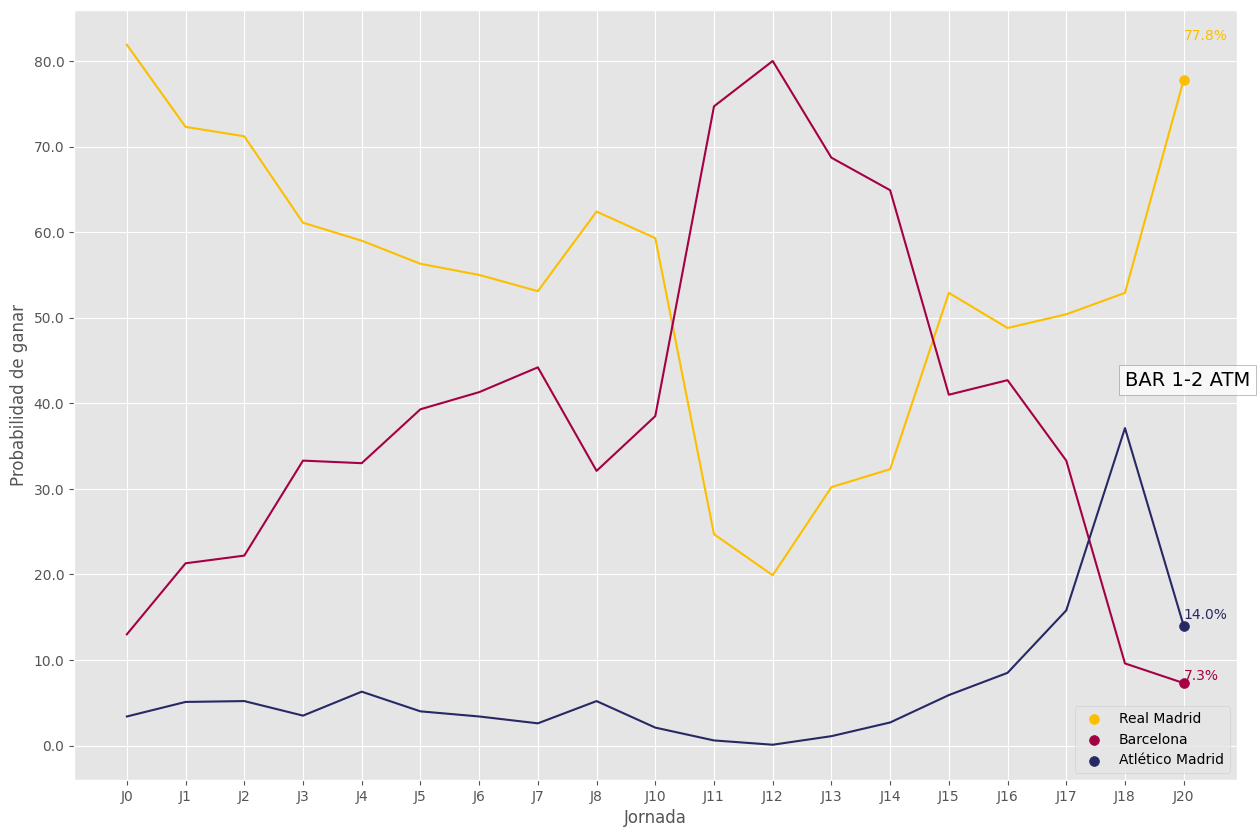

In [9]:
animacion = {'Real Madrid': '#fcbf00', 'Barcelona' :'#a50044', 'Atlético Madrid': '#282864'}
fig, ax = plt.subplots(figsize=(15, 10), dpi = 100)
def update(frame):

    if frame == 0:
        return None

    subset_df = Campeones.T.iloc[:frame]
    ax.clear()
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    for i in animacion:
      ax.plot(subset_df.index, subset_df[i], color = animacion[i])
      ax.scatter(subset_df.index[-1], subset_df[i].values[-1], s=50,
                 label = i, color = animacion[i])
      plt.text(subset_df.index[-1], subset_df[i].values[-1]*1.06,
               f"{subset_df[i].values[-1]:,.1f}%", color = animacion[i])
      
    if 9 <= frame <= 13:
      ax.text(subset_df.index[8], subset_df['Real Madrid'].values[8]+5, 
              'ATM 1-1 RM',fontsize=14, color='black', 
              bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

    if 11 <= frame <= 15:
      ax.text(subset_df.index[10], subset_df['Barcelona'].values[10]+5, 
              'RM 0-4 BAR',fontsize=14, color='black', 
              bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
      
    if 18 <= frame <= 23:
      ax.text(subset_df.index[17], subset_df['Atlético Madrid'].values[17]+5, 
              'BAR 1-2 ATM',fontsize=14, color='black', 
              bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

    ax.legend()
    plt.xlabel('Jornada')
    plt.ylabel('Probabilidad de ganar')

path = guardar + '/Probabilidad_Mejores_Equipos.gif'
ani = FuncAnimation(fig, update, frames = Campeones.shape[-1] + 4)
ani.save(path, fps = 1)

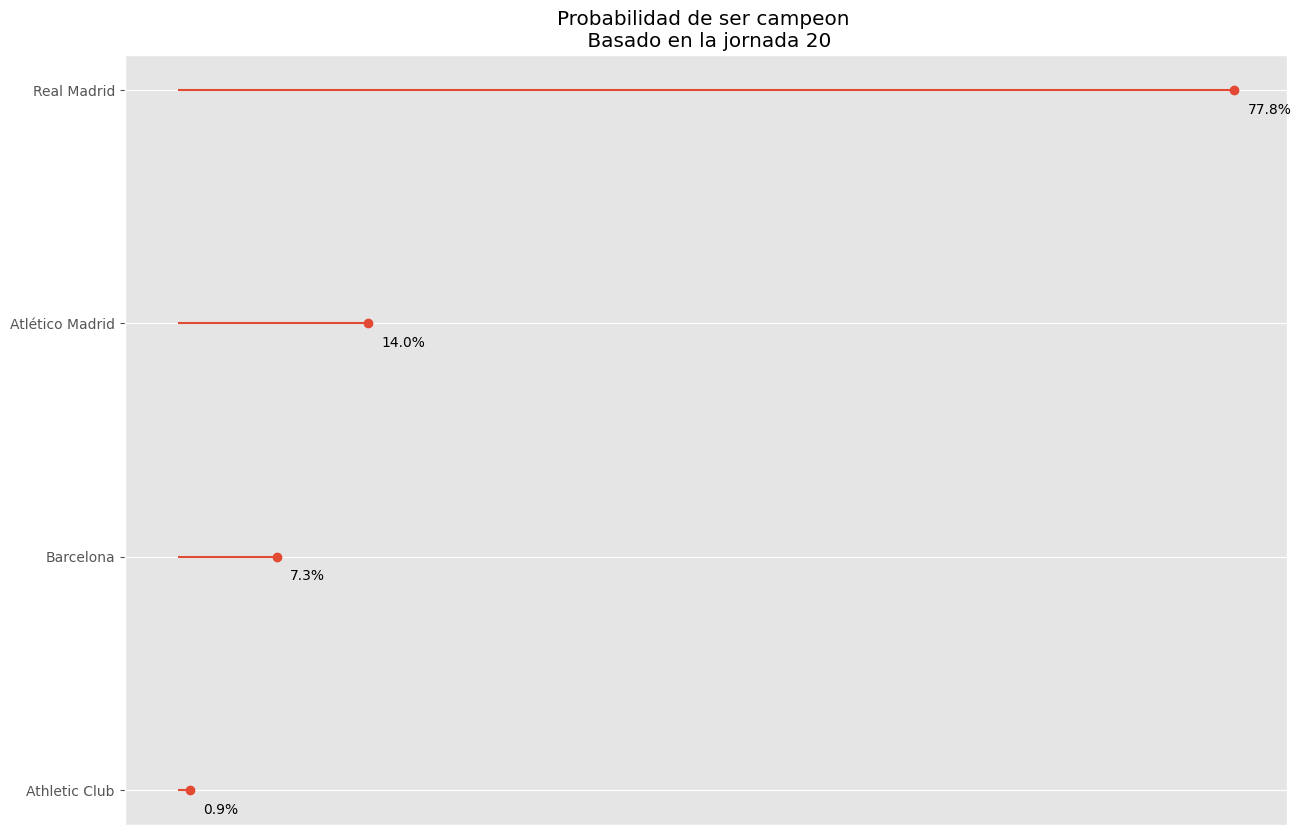

In [10]:
grafica_lollipop(Campeones.reset_index(), 'ser campeon')

# Champions League

In [11]:
Champion

,Equipo,J0,J1,J2,J3,J4,J5,J6,J7,J8,J10,J11,J12,J13,J14,J15,J16,J17,J18,J20
0,Alavés,0.8,1.3,0.2,2.2,2.3,1.2,1.6,3.1,1.0,0.3,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Athletic Club,36.9,33.2,27.6,33.5,19.6,27.5,31.6,47.0,38.0,46.6,48.7,42.0,35.1,38.9,53.1,75.3,83.9,90.8,96.6
2,Atlético Madrid,79.3,78.2,82.6,77.2,87.0,88.0,90.2,93.6,95.1,96.1,91.3,91.5,93.4,98.3,98.5,98.7,99.8,99.8,99.9
3,Barcelona,92.8,96.9,96.5,98.4,98.7,99.6,99.9,99.8,99.8,100.0,100.0,100.0,100.0,100.0,99.9,100.0,99.9,99.3,99.8
4,Betis,9.8,9.2,9.6,11.4,9.2,9.6,9.3,6.5,6.2,5.2,8.6,14.9,9.1,1.5,1.2,0.7,1.8,0.4,0.0
5,Celta Vigo,2.7,2.6,5.1,2.2,1.3,1.5,1.4,2.0,0.4,0.9,1.1,0.8,0.7,1.0,0.6,0.1,0.1,0.0,0.0
6,Espanyol,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Getafe,0.3,0.6,0.5,0.5,0.2,0.1,0.2,0.0,0.2,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Girona,46.0,50.6,44.8,46.6,61.8,43.7,40.3,20.2,21.3,14.5,8.2,9.3,10.3,12.6,9.8,3.7,2.7,1.8,0.7
9,Las Palmas,0.0,0.1,0.1,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


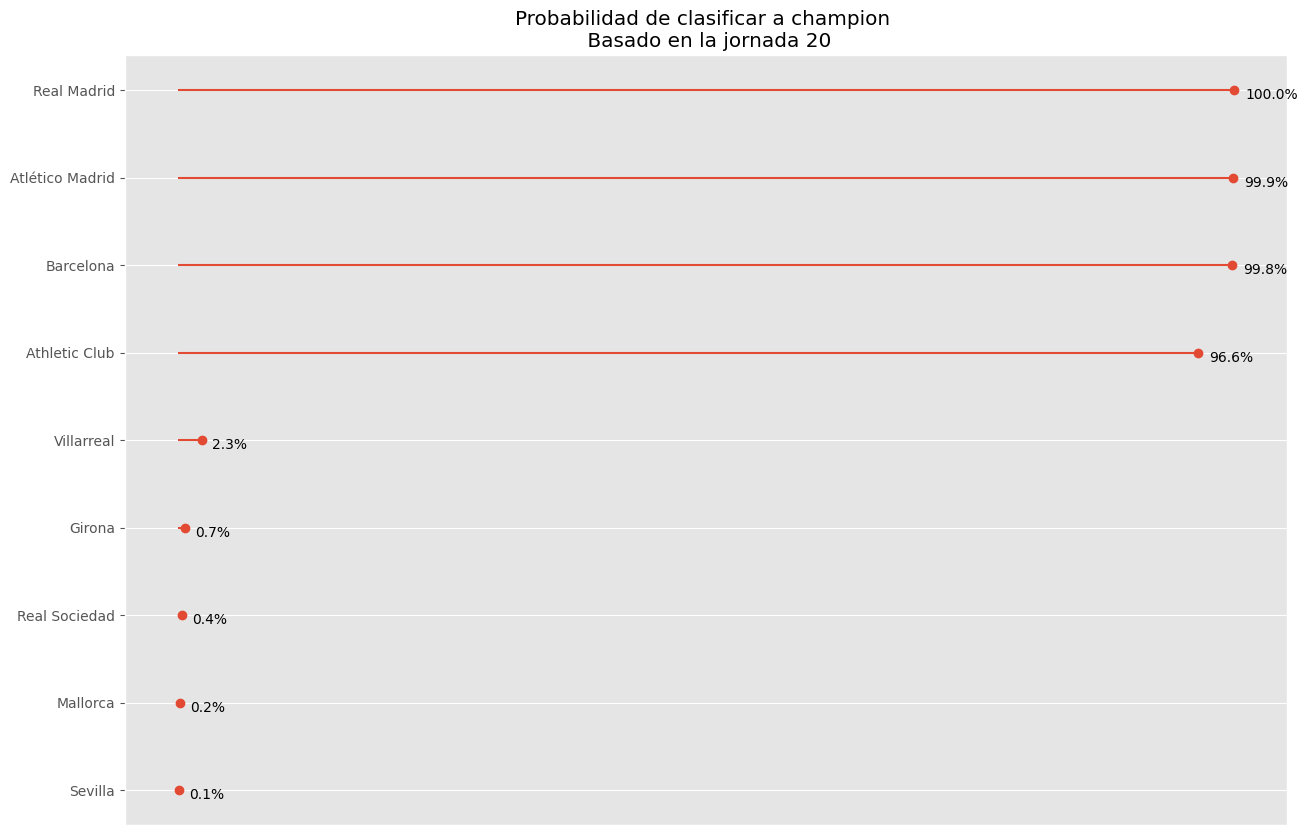

In [12]:
grafica_lollipop(Champion, 'clasificar a champion')

# Europa League

In [13]:
Europa

,Equipo,J0,J1,J2,J3,J4,J5,J6,J7,J8,J10,J11,J12,J13,J14,J15,J16,J17,J18,J20
0,Alavés,6.3,3.9,4.2,7.3,13.0,6.0,10.0,12.2,7.4,1.8,0.7,0.8,0.9,1.4,0.3,0.1,0.5,0.2,0.9
1,Athletic Club,34.9,35.2,34.7,37.2,39.2,39.9,42.0,36.8,39.1,35.9,34.9,37.3,40.1,42.2,34.6,22.0,14.7,8.4,3.4
2,Atlético Madrid,15.4,16.1,13.8,17.4,11.4,10.9,8.2,5.7,4.6,3.5,7.9,7.6,5.6,1.5,1.4,1.3,0.2,0.2,0.1
3,Barcelona,6.1,2.7,3.3,1.5,1.2,0.3,0.1,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0.7,0.2
4,Betis,24.6,26.0,25.6,26.0,29.7,29.2,24.9,22.4,23.5,24.2,30.0,30.9,29.9,16.7,9.0,12.9,29.8,23.3,5.7
5,Celta Vigo,6.9,9.2,14.1,10.1,8.3,10.0,9.1,8.4,5.0,10.8,6.2,5.7,3.8,6.6,2.9,5.6,4.3,7.3,4.0
6,Espanyol,0.3,0.1,0.0,0.0,0.0,0.7,0.4,0.2,0.0,0.3,0.0,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0
7,Getafe,1.5,3.1,3.4,2.2,2.0,0.7,1.2,0.7,0.7,0.9,1.1,0.7,0.4,0.2,0.1,0.3,0.3,0.3,0.5
8,Girona,32.4,32.9,34.1,32.8,26.6,37.8,36.8,42.8,37.2,36.7,29.7,29.3,33.6,41.5,43.1,38.5,29.2,37.5,42.8
9,Las Palmas,0.2,0.2,0.2,0.1,0.3,0.1,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.3,0.8,0.9,0.8,0.4


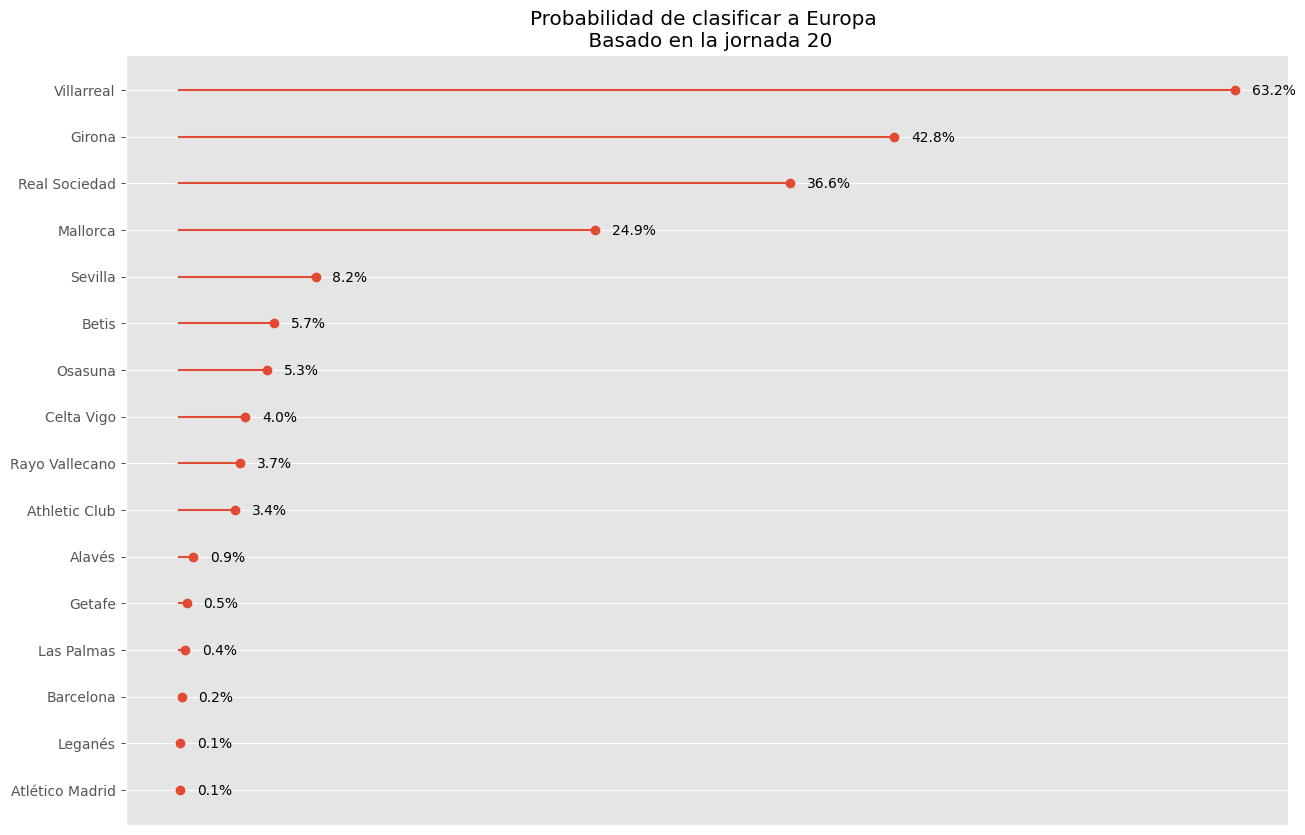

In [14]:
grafica_lollipop(Europa, 'clasificar a Europa')

# Descender a segunda division

In [15]:
Descenso

,Equipo,J0,J1,J2,J3,J4,J5,J6,J7,J8,J10,J11,J12,J13,J14,J15,J16,J17,J18,J20
0,Alavés,5.2,8.4,7.8,2.9,1.3,1.9,2.1,1.1,2.1,6.7,11.5,6.8,9.8,11.2,17.1,13.6,16.6,8.9,10.8
1,Athletic Club,0.0,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Betis,0.5,0.7,0.5,0.1,0.2,0.0,0.2,0.4,0.1,0.1,0.1,0.0,0.0,0.2,0.3,0.3,0.2,0.0,1.2
3,Celta Vigo,4.3,2.8,1.3,1.5,2.9,0.9,1.4,2.0,2.6,1.8,2.3,2.0,2.3,0.6,3.5,0.9,1.9,0.3,1.8
4,Espanyol,45.7,60.1,69.5,59.2,44.6,28.9,32.4,33.2,40.9,31.5,47.6,49.1,53.6,58.0,42.9,43.0,58.4,59.6,67.8
5,Getafe,13.0,11.7,12.6,13.3,13.3,17.2,20.4,25.2,15.5,14.2,14.6,17.4,27.6,21.2,25.8,27.0,18.6,29.4,18.0
6,Girona,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
7,Las Palmas,35.8,40.2,42.9,41.1,46.4,56.9,60.3,64.8,65.0,62.8,44.6,46.5,35.6,42.3,20.3,11.0,11.2,4.4,15.3
8,Leganés,70.3,69.0,58.5,57.1,65.8,68.7,69.0,75.4,70.1,72.2,65.7,58.7,49.6,50.8,49.6,55.6,32.6,36.4,24.7
9,Mallorca,11.1,9.3,14.2,15.8,7.6,11.0,8.1,2.2,0.6,0.7,0.7,0.4,0.6,0.7,0.2,0.6,0.5,0.0,0.1


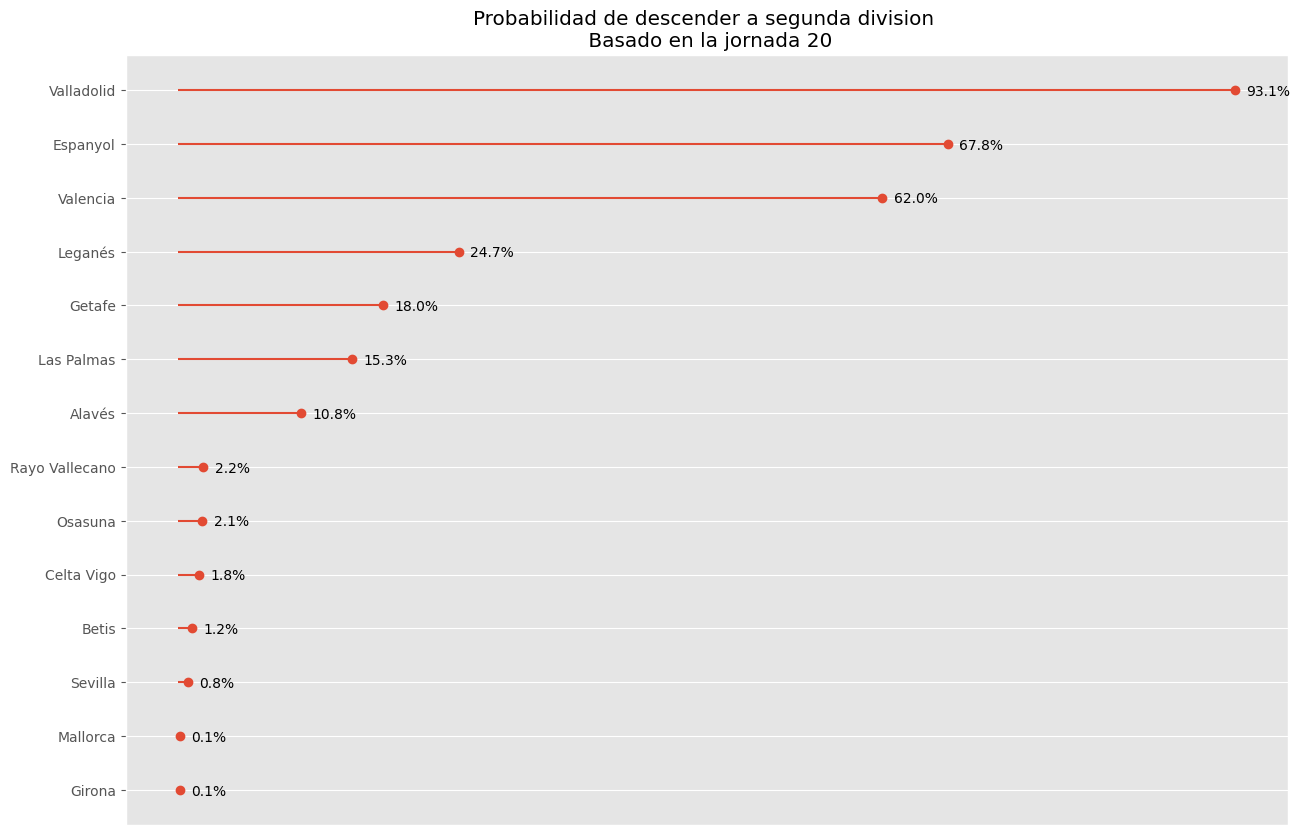

In [16]:
grafica_lollipop(Descenso, 'descender a segunda division')